In [14]:
import numpy as np
import pandas as pd

In [15]:
class LogisticRegression:
   
    def __init__(self, lr= 0.001, iterations= 1000):
        self.lr = lr
        self.iterations = iterations
        self.theta = None
        self.bias = None
    
   
   # X is a numpy array with m samples and n features (m X n)
   # Y is a row vector of size 1 x n
    def fit(self, X, y):
        # initialising the parameters and weights
        n_samples, n_features = X.shape
        self.theta = np.random.random_sample((n_features, 1))
        self.bias = np.random.random_sample()
        loss = []
        # gradient descent
        for _ in range(self.iterations):
            linear_model = X @ self.theta + self.bias
            y_predicted = self._sigmoid(linear_model)

            dt = (1/n_samples) * (X.T @ (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.theta -= self.lr * dt
            self.bias -= self.lr * db
            linear_model = X @ self.theta + self.bias
            y_predicted = self._sigmoid(linear_model)
            loss.append(self._compute_cost(y_predicted, y))
        self.loss = loss
    # predicting unknown data    
    def predict(self, X):
        linear_model = X @ self.theta + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        y_predicted_cls = np.array(y_predicted_cls).reshape((X.shape[0], 1))
        return y_predicted_cls

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def accuracy(self, y_true, y_pred):
        accuracy = (np.sum(y_true == y_pred)) / len(y_true)
        return accuracy
    # the log loss cost function
    def _compute_cost(self, h, y):
        n_samples = h.shape[0]
        epsilon = 1e-5
        cost = (1/n_samples)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
        return cost

    def cost(self): 
        return self.loss


In [16]:
from scipy.io import loadmat
import numpy as np 
import pandas as pd 

In [17]:
data5 = loadmat('data5.mat')
data = pd.DataFrame(data5['x']) 

In [18]:
X = data.iloc[:, :72]
y = data.iloc[:, 72]

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.99)
X_new = pca.fit_transform(X)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state= 23)
#X_train, X_test, y_train, y_test = train_test_split(X, y)
y_train = y_train.to_numpy().reshape(y_train.shape[0], 1)
y_test = y_test.to_numpy().reshape(y_test.shape[0], 1)

In [21]:
regressor = LogisticRegression(lr= 0.001, iterations= 1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
score = regressor.accuracy(y_test, predictions)
print(score)

0.7728119180633147


In [22]:
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt

In [23]:
cm = metrics.confusion_matrix(y_test, predictions)

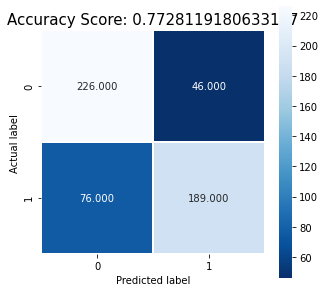

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.show()
#plt.savefig('Logistic confusion matrix')

In [27]:
loss = regressor.cost()
output = np.concatenate(loss).ravel().tolist()

Text(0.5, 1.0, 'Log Loss')

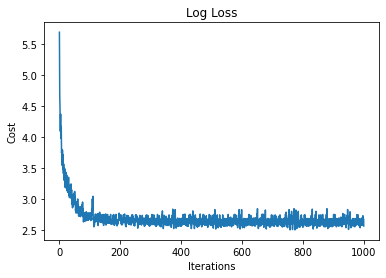

In [26]:
iterations = [i for i in range(1, 1001)]
fig, ax = plt.subplots()
ax.plot(iterations, output)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Log Loss')